In [3]:
from PyP100 import PyP110
import pandas as pd
from datetime import datetime

p110 = PyP110.P110("192.168.1.107", "vio.schwarz89@gmail.com", "&uR^8hQVKg%$3oLoEX") #Creating a P110 plug object

p110.handshake() #Creates the cookies required for further methods
p110.login() #Sends credentials to the plug and creates AES Key and IV for further methods

#PyP110 has all PyP100 functions and additionally allows to query energy usage infos
resultBüro = p110.getEnergyUsage() #Returns dict with all the energy usage

p110 = PyP110.P110("192.168.1.108", "vio.schwarz89@gmail.com", "&uR^8hQVKg%$3oLoEX") #Creating a P110 plug object

p110.handshake() #Creates the cookies required for further methods
p110.login() #Sends credentials to the plug and creates AES Key and IV for further methods

#PyP110 has all PyP100 functions and additionally allows to query energy usage infos
resultWohnung = p110.getEnergyUsage() #Returns dict with all the energy usage



energy24H = pd.DataFrame.from_dict(resultBüro["result"]["past24h"])
energy7D = pd.DataFrame.from_dict(resultBüro["result"]["past7d"])
energyMonth = pd.DataFrame.from_dict(resultBüro["result"]["past30d"])

energy24H = pd.DataFrame.from_dict(resultWohnung["result"]["past24h"])
energy7D = pd.DataFrame.from_dict(resultWohnung["result"]["past7d"])
energyMonth = pd.DataFrame.from_dict(resultWohnung["result"]["past30d"])

dates24H = pd.date_range(start=datetime.today().strftime('%Y-%m-%d'), periods=24,  freq='H').tolist()

filepath = "energyMonitor-" + datetime.today().strftime('%d%m%Y')
#energy24H.to_csv(filepath, header=['energy'])  


filepath = "energyMonitor-" + datetime.today().strftime("%Y-Week%W")
#energy7D.to_csv(filepath, header=['energy'])

filepath = "energyMonitor-" + datetime.today().strftime("%Y-%B")
#energyMonth.to_csv(filepath, header=['energy'])

In [4]:
energy24H = pd.DataFrame.from_dict(result["result"]["past24h"])
energy24H.columns=["energy"]
energy24H

energy
0       13
1       13
2       14
3       13
4       13
5       14
6       13
7       13
8       13
9       14
10      13
11      13
12      14
13      13
14      13
15      13
16      14
17      13
18      13
19      14
20      13
21      14
22      13
23      11

In [89]:
colNames = ["hour","energy"]
energyMonth = pd.read_csv("energyMonitor-19032022",names=colNames, header=0)

<AxesSubplot:>

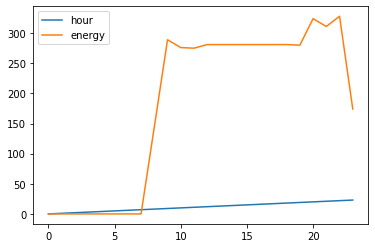

In [91]:
energyMonth.plot()

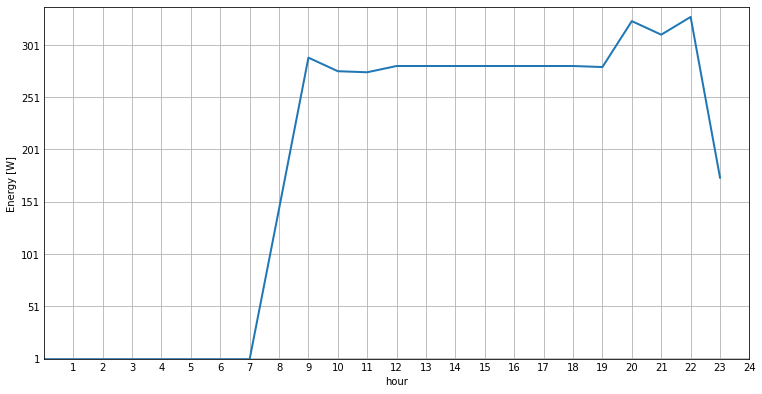

In [106]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')


# plot
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(energyMonth["hour"], energyMonth["energy"], linewidth=2.0)

ymax = np.max(energyMonth["energy"])

ax.set(xlim=(0, 24), xticks=np.arange(1, 25),
       ylim=(0, ymax +10), yticks=np.arange(1, ymax,50),
      xlabel="hour",ylabel="Energy [W]")

plt.show()

In [127]:
from datetime import timedelta
hours = [1,2,3,4,5,6,7,8,9,10,11,12]
dates = [datetime.now() + timedelta(hours=i) for i in hours]

In [129]:
dates[0].strftime('%d%m%Y %H:%m')

'19032022 13:03'

In [125]:
DATE_TIME_STRING_FORMAT = '%Y-%m-%dT%H:%MZ'

datetime.strptime('2016-12-02T11:00Z',DATE_TIME_STRING_FORMAT)

datetime.datetime(2016, 12, 2, 11, 0)

In [147]:
pd.date_range(start=datetime.today().strftime('%Y-%m-%d'), periods=24,  freq='H').tolist()

[Timestamp('2022-03-19 00:00:00', freq='H'),
 Timestamp('2022-03-19 01:00:00', freq='H'),
 Timestamp('2022-03-19 02:00:00', freq='H'),
 Timestamp('2022-03-19 03:00:00', freq='H'),
 Timestamp('2022-03-19 04:00:00', freq='H'),
 Timestamp('2022-03-19 05:00:00', freq='H'),
 Timestamp('2022-03-19 06:00:00', freq='H'),
 Timestamp('2022-03-19 07:00:00', freq='H'),
 Timestamp('2022-03-19 08:00:00', freq='H'),
 Timestamp('2022-03-19 09:00:00', freq='H'),
 Timestamp('2022-03-19 10:00:00', freq='H'),
 Timestamp('2022-03-19 11:00:00', freq='H'),
 Timestamp('2022-03-19 12:00:00', freq='H'),
 Timestamp('2022-03-19 13:00:00', freq='H'),
 Timestamp('2022-03-19 14:00:00', freq='H'),
 Timestamp('2022-03-19 15:00:00', freq='H'),
 Timestamp('2022-03-19 16:00:00', freq='H'),
 Timestamp('2022-03-19 17:00:00', freq='H'),
 Timestamp('2022-03-19 18:00:00', freq='H'),
 Timestamp('2022-03-19 19:00:00', freq='H'),
 Timestamp('2022-03-19 20:00:00', freq='H'),
 Timestamp('2022-03-19 21:00:00', freq='H'),
 Timestamp

In [144]:
datetime.today().strftime('%Y-%m-%d')

'2022-03-19'